In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [36]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-20-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/10-20-2020.csv')
apple_mobility = pd.read_csv('https://covid19-static.cdn-apple.com/covid19-mobility-data/2019HotfixDev14/v3/en-us/applemobilitytrends-2020-10-20.csv')

In [105]:
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1479,1480,1481,1481,1485,1488,1492,1497,1499,1501
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,424,429,434,439,443,448,451,454,458,462
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1809,1818,1827,1827,1841,1846,1856,1865,1873,1880
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,57,57,59,59,59,59,59,62,62,63
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,219,222,227,228,234,241,247,248,251,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,387,391,393,401,402,402,408,413,421,427
263,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
264,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,596,596,596,596,596,596,597,597,597,597
265,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,345,345,345,346,346,346,346,346,346,346


In [94]:
poland_conf = confirmed_df.loc[confirmed_df['Country/Region'] == "Poland"]

In [107]:
poland_deaths = deaths_df.loc[deaths_df["Country/Region"] == "Poland"]

In [96]:
poland_rec = recoveries_df.loc[recoveries_df["Country/Region"] == "Poland"]

In [100]:
poland_conf = pd.melt(poland_conf, id_vars=["Province/State", "Country/Region","Lat", "Long"])

In [110]:
poland_deaths = pd.melt(poland_deaths, id_vars=["Province/State", "Country/Region","Lat", "Long"])

In [97]:
poland_rec = pd.melt(poland_rec, id_vars=["Province/State", "Country/Region","Lat", "Long"])

In [119]:
cols = confirmed_df.keys()

In [120]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [143]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = []

for i in dates:
    conf_world = confirmed[i]
    deaths_world = deaths[i]
    recovery_world = recoveries[i]

world_cases.append(confirmed_sum.sum())
total_deaths.append(deaths_world.sum())
total_recovered.append(recovery_world.sum())


In [150]:
total_active.append(conf_world - deaths_world - recovery_world)

In [205]:
s = pd.merge(poland_conf, poland_deaths[['variable', "value"]], on = 'variable', how = 'left')
s

,Province/State,Country/Region,Lat,Long,variable,value_x,value_y
0,NaN,Poland,51.9194,19.1451,1/22/20,0,0
1,NaN,Poland,51.9194,19.1451,1/23/20,0,0
2,NaN,Poland,51.9194,19.1451,1/24/20,0,0
3,NaN,Poland,51.9194,19.1451,1/25/20,0,0
4,NaN,Poland,51.9194,19.1451,1/26/20,0,0
...,...,...,...,...,...,...,...
269,NaN,Poland,51.9194,19.1451,10/17/20,167230,3524
270,NaN,Poland,51.9194,19.1451,10/18/20,175766,3573
271,NaN,Poland,51.9194,19.1451,10/19/20,183248,3614
272,NaN,Poland,51.9194,19.1451,10/20/20,192539,3721


In [206]:
f = pd.merge(s, poland_rec[['variable', "value"]], on = 'variable', how = 'left')
f

,Province/State,Country/Region,Lat,Long,variable,value_x,value_y,value
0,NaN,Poland,51.9194,19.1451,1/22/20,0,0,0
1,NaN,Poland,51.9194,19.1451,1/23/20,0,0,0
2,NaN,Poland,51.9194,19.1451,1/24/20,0,0,0
3,NaN,Poland,51.9194,19.1451,1/25/20,0,0,0
4,NaN,Poland,51.9194,19.1451,1/26/20,0,0,0
...,...,...,...,...,...,...,...,...
269,NaN,Poland,51.9194,19.1451,10/17/20,167230,3524,90162
270,NaN,Poland,51.9194,19.1451,10/18/20,175766,3573,92651
271,NaN,Poland,51.9194,19.1451,10/19/20,183248,3614,94014
272,NaN,Poland,51.9194,19.1451,10/20/20,192539,3721,95956


In [208]:
f.rename(columns = {"value_y":"Deaths_value", "value_x":"Conf_value", "value":"Recovery_value"}, inplace= True)

In [216]:
f

,Province/State,Country/Region,Lat,Long,variable,Conf_value,Deaths_value,Recovery_value,Daily_conf
0,NaN,Poland,51.9194,19.1451,1/22/20,0,0,0,NaN
1,NaN,Poland,51.9194,19.1451,1/23/20,0,0,0,0.0
2,NaN,Poland,51.9194,19.1451,1/24/20,0,0,0,0.0
3,NaN,Poland,51.9194,19.1451,1/25/20,0,0,0,0.0
4,NaN,Poland,51.9194,19.1451,1/26/20,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
269,NaN,Poland,51.9194,19.1451,10/17/20,167230,3524,90162,9622.0
270,NaN,Poland,51.9194,19.1451,10/18/20,175766,3573,92651,8536.0
271,NaN,Poland,51.9194,19.1451,10/19/20,183248,3614,94014,7482.0
272,NaN,Poland,51.9194,19.1451,10/20/20,192539,3721,95956,9291.0


In [217]:
f['Daily_conf'] = f.Conf_value.diff()
f['Daily_deaths'] = f.Deaths_value.diff()
f['Daily_recovery'] = f.Recovery_value.diff()

In [311]:
f

,Province/State,Country/Region,Lat,Long,variable,Conf_value,Deaths_value,Recovery_value,Daily_conf,Daily_deaths,Daily_recovery,Index_conf,Index_deaths,Index_recovery
0,NaN,Poland,51.9194,19.1451,1/22/20,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Poland,51.9194,19.1451,1/23/20,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN
2,NaN,Poland,51.9194,19.1451,1/24/20,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN
3,NaN,Poland,51.9194,19.1451,1/25/20,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN
4,NaN,Poland,51.9194,19.1451,1/26/20,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Poland,51.9194,19.1451,10/17/20,167230,3524,90162,9622.0,84.0,2389.0,1.248799,0.636364,1.093364
270,NaN,Poland,51.9194,19.1451,10/18/20,175766,3573,92651,8536.0,49.0,2489.0,0.887134,0.583333,1.041859
271,NaN,Poland,51.9194,19.1451,10/19/20,183248,3614,94014,7482.0,41.0,1363.0,0.876523,0.836735,0.547609
272,NaN,Poland,51.9194,19.1451,10/20/20,192539,3721,95956,9291.0,107.0,1942.0,1.241780,2.609756,1.424798


In [310]:
f["Index_conf"] = f.Daily_conf  / f.Daily_conf.shift()
f["Index_deaths"] = f.Daily_deaths  / f.Daily_deaths.shift()
f["Index_recovery"] = f.Daily_recovery  / f.Daily_recovery.shift()

Text(0, 0.5, 'Index')

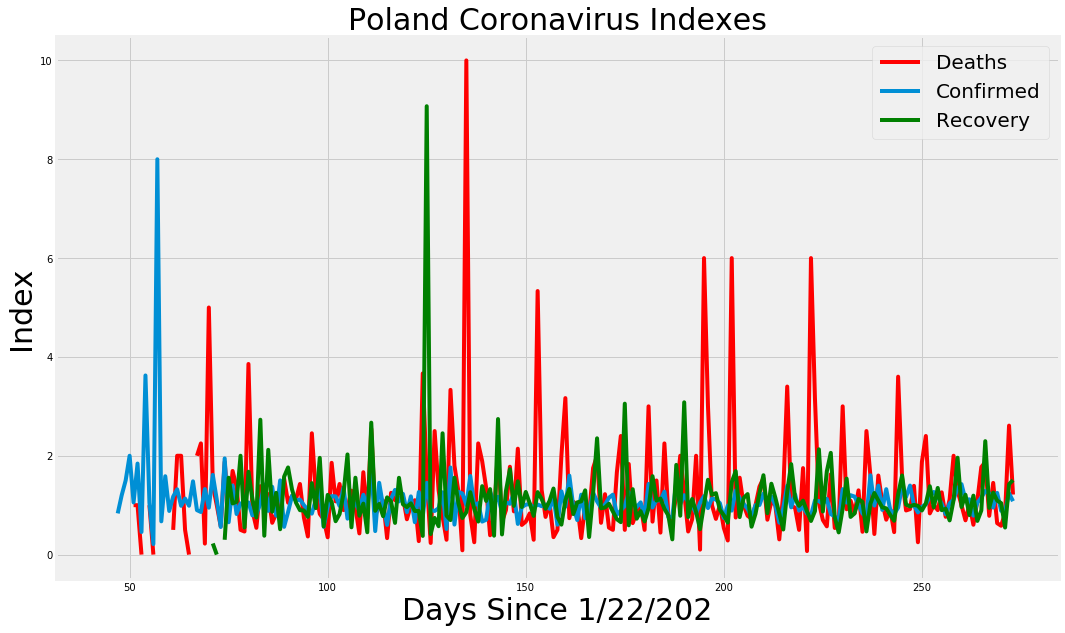

In [323]:
plt.figure(figsize = (16, 10))
plt.plot(f.Index_deaths, color = "red")
plt.plot(f.Index_conf)
plt.plot(f.Index_recovery, color = "green")

plt.title('Poland Coronavirus Indexes', size = 30)
plt.legend(['Deaths', 'Confirmed', "Recovery"],prop={'size': 20})
plt.xlabel('Days Since 1/22/202', size = 30)
plt.ylabel('Index', size = 30)